In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('Downloads/train.csv')
test=pd.read_csv('Downloads/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# visualization of dataset

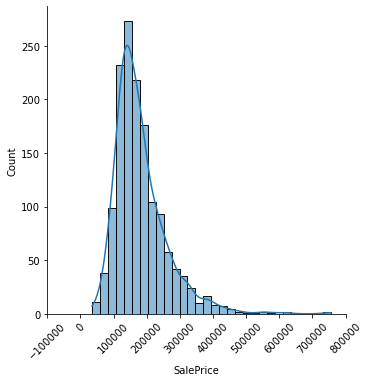

In [4]:
ax=sns.displot(data=train,x='SalePrice',bins=30,kde=True)
ax.set_xticklabels(rotation=45)
ax

In [5]:
train['SalePrice']=np.log(train['SalePrice'])

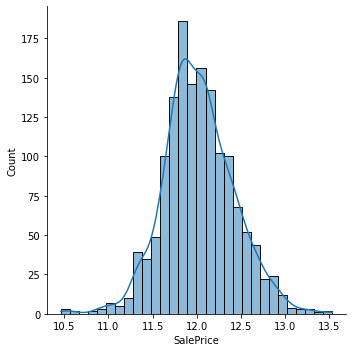

In [6]:
sns.displot(data=train,x='SalePrice',bins=30,kde=True)

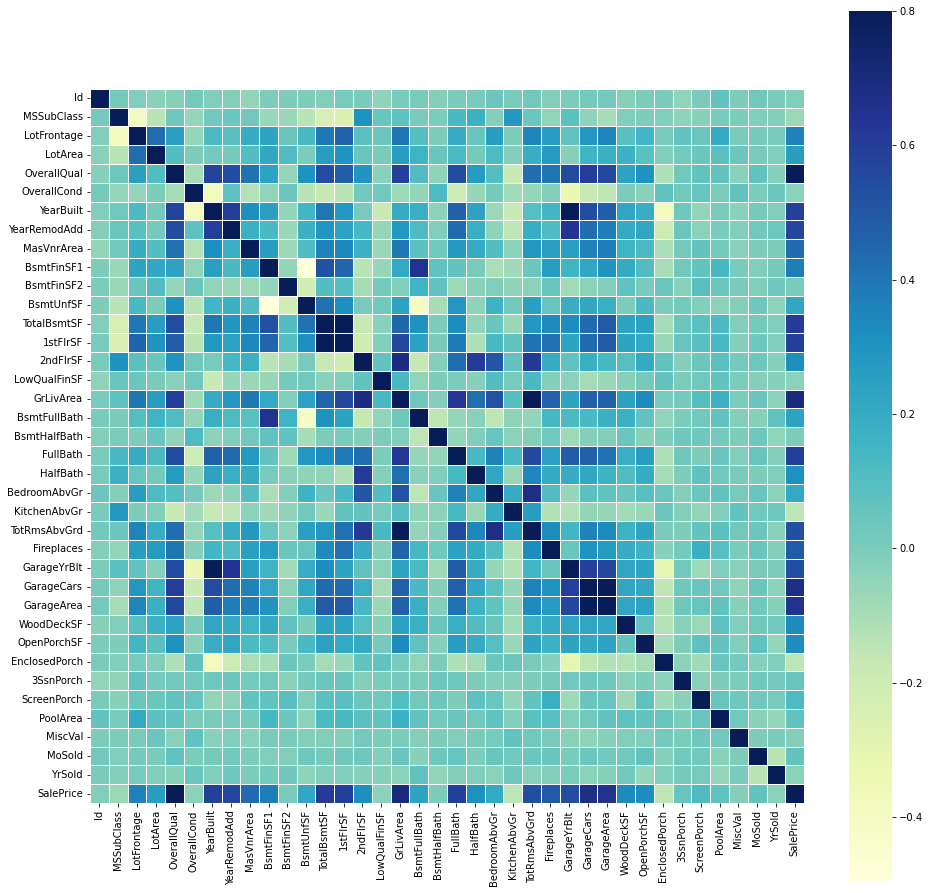

In [7]:
# now we are going to see any large correlation among the variables
#correlation plot
corrmat=train.corr()
f,ax=plt.subplots(figsize=(16,16))
sns.heatmap(corrmat,vmax=.8,square=True,cmap='YlGnBu',linewidths=0.5)
plt.show()

In [8]:
# here are the highest correlation ,which we should look into one by one
corr=pd.melt(corrmat,ignore_index=False)

In [9]:
corr=corr[corr.value!=1]
corr.head()

,variable,value
MSSubClass,Id,0.011156
LotFrontage,Id,-0.010601
LotArea,Id,-0.033226
OverallQual,Id,-0.028365
OverallCond,Id,0.012609


In [10]:

corr.sort_values(by='value',ascending=False).head(20)

,variable,value
GarageArea,GarageCars,0.882475
GarageCars,GarageArea,0.882475
GarageYrBlt,YearBuilt,0.825667
YearBuilt,GarageYrBlt,0.825667
TotRmsAbvGrd,GrLivArea,0.825489
GrLivArea,TotRmsAbvGrd,0.825489
TotalBsmtSF,1stFlrSF,0.819530
1stFlrSF,TotalBsmtSF,0.819530
OverallQual,SalePrice,0.817184
SalePrice,OverallQual,0.817184


lets look into those variables which are highly correlated with the dependent variable(SalePrice)

In [11]:
corr=corr[corr['variable']=='SalePrice']
corr.sort_values(by='value',ascending=False).reset_index().head(20)

,index,variable,value
0,OverallQual,SalePrice,0.817184
1,GrLivArea,SalePrice,0.700927
2,GarageCars,SalePrice,0.680625
3,GarageArea,SalePrice,0.650888
4,TotalBsmtSF,SalePrice,0.612134
5,1stFlrSF,SalePrice,0.596981
6,FullBath,SalePrice,0.594771
7,YearBuilt,SalePrice,0.586570
8,YearRemodAdd,SalePrice,0.565608
9,GarageYrBlt,SalePrice,0.541073


In [12]:
data=corr[corr.value>0.5].reset_index().sort_values(by='value',ascending=True)

[Text(0.5, 1.0, 'Top correlated variabble with SalePrice')]

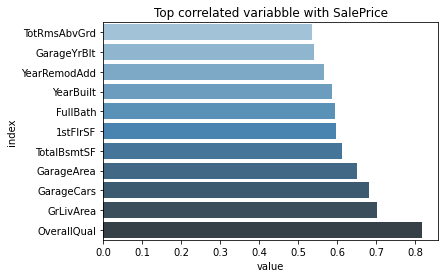

In [13]:
sns.barplot(data=data,x='value',y='index',palette='Blues_d').set(title='Top correlated variabble with SalePrice')

relationship between the overall quality of the house and price of it

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

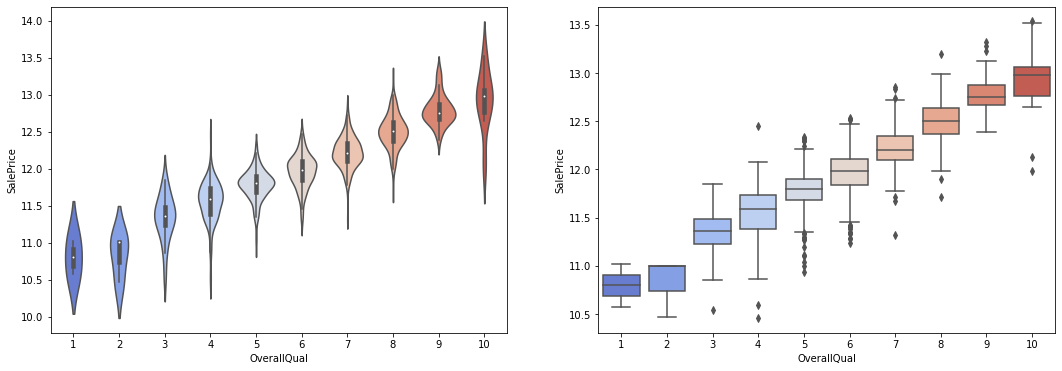

In [14]:
figure,ax=plt.subplots(1,2,figsize=(18,6))
sns.violinplot(data=train,x='OverallQual',y='SalePrice',ax=ax[0],palette='coolwarm')
sns.boxplot(data=train,x='OverallQual',y='SalePrice',ax=ax[1],palette='coolwarm')

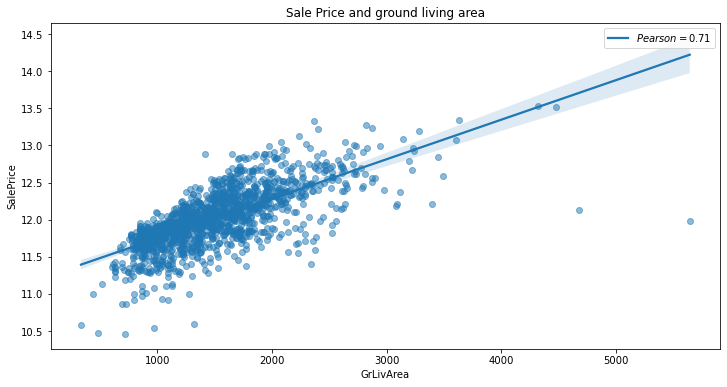

In [15]:
plt.figure(figsize=(12,6))
sns.regplot(data=train,x='GrLivArea',y='SalePrice',scatter_kws={'alpha':0.5})
plt.title('Sale Price and ground living area')
plt.legend(['$Pearson=${:0.2f}'.format(0.71)],loc='best')
plt.show()


<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

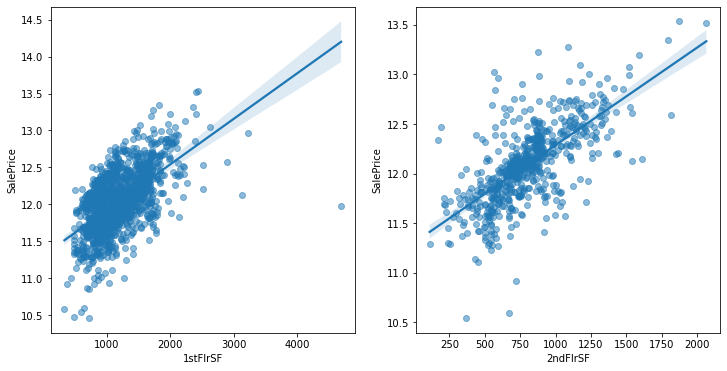

In [16]:
figure,ax=plt.subplots(1,2,figsize=(12,6))
sns.regplot(data=train[train['1stFlrSF']>0],x='1stFlrSF',y='SalePrice',scatter_kws={'alpha':0.5},ax=ax[0])
sns.regplot(data=train[train['2ndFlrSF']>0],x='2ndFlrSF',y='SalePrice',scatter_kws={'alpha':0.5},ax=ax[1])

## sale price and total basement area

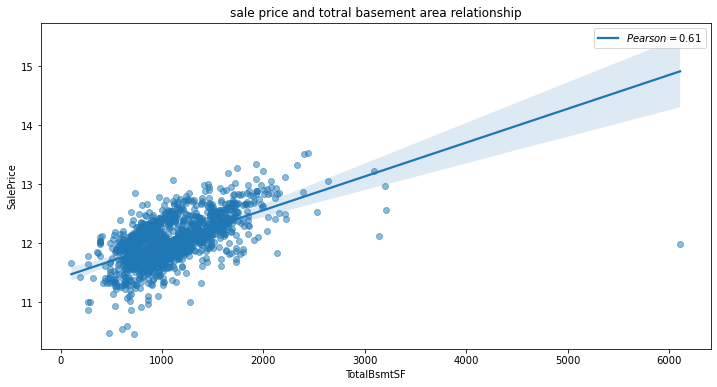

In [17]:
plt.figure(figsize=(12,6))
sns.regplot(data=train[train.TotalBsmtSF>0],x='TotalBsmtSF',y='SalePrice',scatter_kws={'alpha':0.5})
plt.title('sale price and totral basement area relationship')
plt.legend(['$Pearson=${:.2f}'.format(0.612134)],loc='best')
plt.show()

this plot shows a linear relationship ,although there is a n outlierhaving the value of around 6000 in the total basement sf. this will not have a large impact on the model so it should not be removed

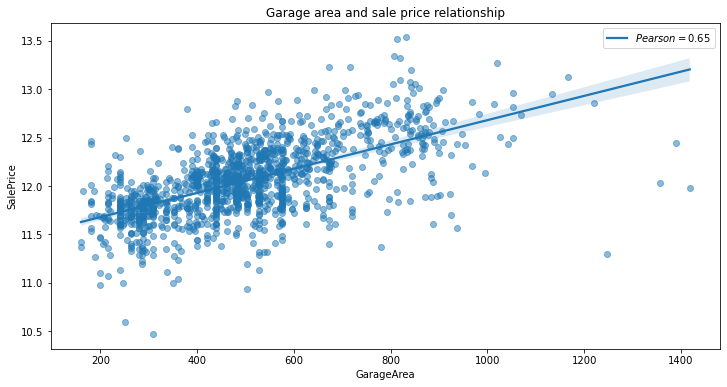

In [18]:
plt.figure(figsize=(12,6))
sns.regplot(data=train[train.GarageArea>0],x='GarageArea',y='SalePrice',scatter_kws={'alpha':0.5})
plt.title('Garage area and sale price relationship')
plt.legend(['$Pearson=${:0.2f}'.format(0.65088)],loc='best')
plt.show()



# Data Edit

Since both test and train datasets have missing values and the best dataset has values not present in the train data, it is easier to edit both of them now

In [19]:
data=pd.concat([train,test])
dat=data

In [20]:
data.shape

(2919, 81)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

MSSubClass and MoSold are numeric ,although they are supposed to indicate different clases disregarding the actual value of the clas ,let make into a string

In [23]:
data.MSSubClass=data.MSSubClass.astype('object')
data.MoSold=data.MoSold.astype('object')

Create new variables

In [24]:
data['GarageYr']=data['GarageYrBlt']-data['YearBuilt']
data.GarageYr=data.GarageYr.astype('object')

In [25]:
data['Bathrooms']=(data['FullBath']+data['BsmtFullBath']+(data['HalfBath']+data['BsmtHalfBath'])/2)


In [26]:
data['RoomArea']=data['GrLivArea']/(data['TotRmsAbvGrd']+data['Bathrooms']+data['KitchenAbvGr'])

Relationship between total number of bathrooms in the house and the price of ir

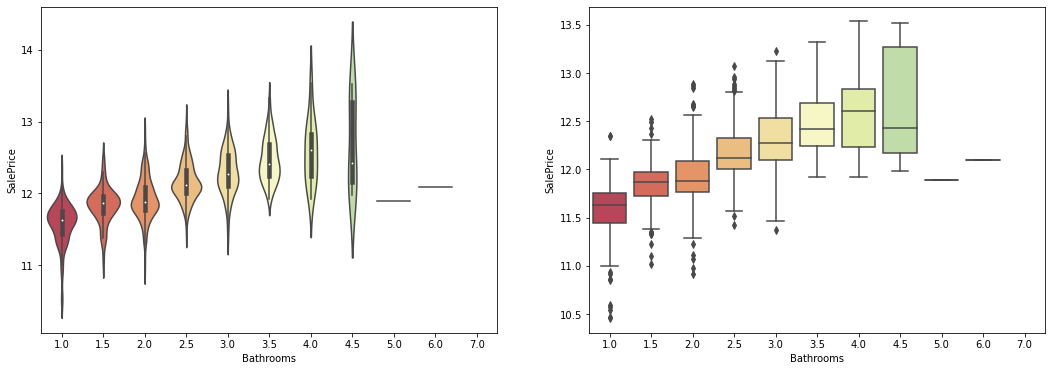

In [27]:
figure,ax=plt.subplots(1,2,figsize=(18,6))
sns.violinplot(data=data,x='Bathrooms',y='SalePrice',ax=ax[0],palette='Spectral')
sns.boxplot(data=data,x='Bathrooms',y='SalePrice',ax=ax[1],palette='Spectral')
plt.show()

these plots shows that  the sale price increase with the number of bathrooms ,however above 4 bathrooms the trend is not that certain

Average room size and price of thee house

[Text(0.5, 1.0, 'Average room size and saleprice')]

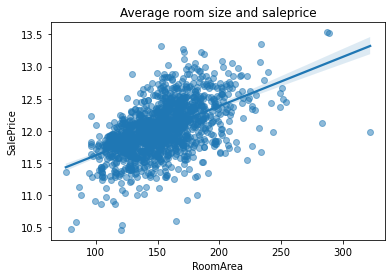

In [28]:
sns.regplot(data=data,x='RoomArea',y='SalePrice',scatter_kws={'alpha':0.5}).set(title='Average room size and saleprice')

drop useless variables that have high correlations

In [29]:
data.drop('GarageYrBlt',inplace=True,axis=1)
data.drop('GarageCars',inplace=True,axis=1)

# Missing Values

3 variables have too many missing datas ,however it is only becouse most homes lack
some of the features the variable tries to measure.In the case of PoolQC we can see that it has a lot of missing data,but it 
is only becouse many houses do not have a pool, therefore they can not measure its quality

In [30]:
data.isna().sum().sort_values(ascending=False).head(40)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageQual       159
GarageYr         159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
RoomArea           2
Bathrooms          2
Utilities          2
Exterior2nd        1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
Electrical         1
GarageArea         1
TotalBsmtSF        1
BsmtFinSF2         1
BsmtUnfSF          1
Exterior1st        1
MiscVal            0
PoolArea           0
BedroomAbvGr       0
ScreenPorch        0
dtype: int64

In [31]:
data['PoolQC']=data['PoolQC'].fillna('None')
data['Alley']=data['Alley'].fillna('None')
data['fence']=data['Fence'].fillna('None')
data['MiscFeature']=data['MiscFeature'].fillna('None')
data['FireplaceQu']=data['FireplaceQu'].fillna('None')

In [32]:
data['LotFrontage']=data['LotFrontage'].fillna(0.0)
data['GarageFinish']=data['GarageFinish'].fillna('None')
data['GarageQual']=data['GarageQual'].fillna('None')
data['GarageCond']=data['GarageCond'].fillna('None')

In [33]:
data['GarageType']=data['GarageType'].fillna('None')
data['GarageYr']=data['GarageYr'].fillna('None')
data['BsmtExposure']=data['BsmtExposure'].fillna('None')
data['BsmtCond']=data['BsmtCond'].fillna('None')
data['BsmtQual']=data['BsmtQual'].fillna('None')

In [34]:
data['BsmtFinType2']=data['BsmtFinType2'].fillna('None')

In [35]:
data['BsmtFinType1']=data['BsmtFinType1'].fillna('None')

In [36]:
data['MasVnrType']=data['MasVnrType'].fillna('None')

In [37]:
data['MasVnrArea']=data['MasVnrArea'].fillna(0.0)
data['MSZoning']=data['MSZoning'].fillna('None')
data['Functional']=data['Functional'].fillna('None')

mistake correction of filling null values

In [38]:
data[['MSZoning','Functional']]=dat[['MSZoning','Functional']]

In [39]:
print(data['MSZoning'].isnull().sum())
data['MSZoning']=data['MSZoning'].fillna('RL')
data['Functional']=data['Functional'].fillna('Typ')

0


In [40]:
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0.0)
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0.0)


In [41]:
data['Utilities']=data['Utilities'].fillna('AllPub')
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0.0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0.0)

In [42]:
data['SaleType']=data['SaleType'].fillna('WD')
data['Electrical']=data['Electrical'].fillna('SBrkr')
data['GarageArea']=data['GarageArea'].fillna(0.0)

In [43]:
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0.0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0.0)
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0.0)



In [44]:
data['Exterior1st']=data['Exterior1st'].fillna('VinylSd')
data['KitchenQual']=data['KitchenQual'].fillna('TA')

In [45]:
finalData=pd.get_dummies(data)

In [46]:
finalData.shape

(2919, 444)

# Modelling

In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [111]:
pip install shap

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: llvmlite<0.38,>=0.37.0rc1 in c:\users\abc\anaconda3\lib\site-packages (from numba->shap) (0.37.0)



In [48]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
import shap

In [49]:
x=finalData[finalData.SalePrice.notna()].drop('SalePrice',axis=1)

In [50]:
y=finalData.loc[finalData['SalePrice'].notna(),'SalePrice']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [52]:
dataDmatrix=xgb.DMatrix(data=x_train,label=y_train)

#  XGBoost

get the results of the cross validated XGBoost parameter results . I only iterate for 4 parameters so that the process wont take a lot of time

In [119]:
model=xgb.XGBRegressor()
param_grid={
    'n_estimators':[50,180,200],
    'max_depth':[4,6,8],
    'reg_alpha':[1.1,1.2,1,3],
    'reg_lambda':[1.1,1.2,1.3],
    
}
gs=GridSearchCV(estimator=model,
                param_grid=param_grid,
               n_jobs=1,
               scoring='neg_mean_squared_error',
               verbose=1
               )
fitted_model=gs.fit(x_train,y_train)
pred=fitted_model.predict(x_test)

# root mean squared error
print(np.sqrt(-fitted_model.best_score_))
print(fitted.model.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0.1437452109462475


NameError: name 'fitted' is not defined

In [ ]:
xtest=finalData[finalData.SalePrice.isna()].drop('SalePrice',axis=1)
xtrain=finalData[finalData.SalePrice.notna()].drop('SalePrice',axis=1)
ytrain=finalData.loc[finalData.SalePrice.notna(),'SalePrice']

get the prediction of the model

In [ ]:
prdict=model.fit(xtrain,ytrain)